In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock Dataset/CIPLA.csv')

In [0]:
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [0]:
new_dataset = dataset[['Date','Open','High','Low','Close','Volume']]

In [0]:
new_dataset

,Date,Open,High,Low,Close,Volume
0,2000-01-03,1410.0,1457.35,1380.05,1457.35,21060
1,2000-01-04,1537.0,1537.00,1430.00,1465.25,30215
2,2000-01-05,1474.0,1474.00,1365.00,1435.05,33799
3,2000-01-06,1434.0,1435.00,1349.00,1355.85,33083
4,2000-01-07,1370.0,1389.90,1247.40,1247.55,66536
...,...,...,...,...,...,...
5070,2020-05-22,616.7,641.85,610.10,639.35,10875625
5071,2020-05-26,640.0,646.90,624.05,627.70,8859499
5072,2020-05-27,630.0,637.80,625.80,633.05,7710110
5073,2020-05-28,634.0,637.65,626.05,628.35,5488725


In [0]:
new_dataset.to_csv('/content/drive/My Drive/Colab Notebooks/cipla_new.csv')

In [0]:
dataset_train = new_dataset.iloc[:4974] #dataset of stock prices ranging from year 2000 to year 2019
dataset_test = new_dataset.iloc[4974:]  #dataset of stock prices for year 2020 (till may)

In [0]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,2000-01-03,1410.00,1457.35,1380.05,1457.35,21060
1,2000-01-04,1537.00,1537.00,1430.00,1465.25,30215
2,2000-01-05,1474.00,1474.00,1365.00,1435.05,33799
3,2000-01-06,1434.00,1435.00,1349.00,1355.85,33083
4,2000-01-07,1370.00,1389.90,1247.40,1247.55,66536
...,...,...,...,...,...,...
4969,2019-12-24,467.25,480.00,465.50,478.70,3262749
4970,2019-12-26,478.70,482.55,472.25,474.15,2887784
4971,2019-12-27,474.55,483.50,472.80,481.10,2005404
4972,2019-12-30,481.10,487.00,478.25,479.95,1809828


In [0]:
dataset_test

,Date,Open,High,Low,Close,Volume
4974,2020-01-01,481.00,481.00,474.45,475.90,1316812
4975,2020-01-02,478.85,479.90,472.30,473.50,1406381
4976,2020-01-03,475.80,475.80,467.25,469.95,2252752
4977,2020-01-06,469.80,469.95,461.20,466.75,1501855
4978,2020-01-07,466.00,470.00,463.65,468.60,2365554
...,...,...,...,...,...,...
5070,2020-05-22,616.70,641.85,610.10,639.35,10875625
5071,2020-05-26,640.00,646.90,624.05,627.70,8859499
5072,2020-05-27,630.00,637.80,625.80,633.05,7710110
5073,2020-05-28,634.00,637.65,626.05,628.35,5488725


In [0]:
training_set = dataset_train.iloc[:, 1:2].values  #changing the training set into a numpy array
training_set

array([[1410.  ],
       [1537.  ],
       [1474.  ],
       ...,
       [ 474.55],
       [ 481.1 ],
       [ 479.95]])

In [0]:
len(training_set)

4974

In [0]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.90839915],
       [1.        ],
       [0.95456021],
       ...,
       [0.23369036],
       [0.23841466],
       [0.2375852 ]])

In [0]:
# Creating a data structure with 120 timesteps and 1 output
# we are basically predicting T+1 result using 120 stock prices before T
X_train = []
y_train = []

for i in range(120,4974):
  X_train.append(training_set_scaled[i-120 : i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [0]:
print(X_train)

[[0.90839915 1.         0.95456021 ... 0.52176422 0.50668975 0.52180028]
 [1.         0.95456021 0.92570955 ... 0.50668975 0.52180028 0.51747268]
 [0.95456021 0.92570955 0.87954849 ... 0.52180028 0.51747268 0.50448988]
 ...
 [0.29222114 0.29326698 0.2919687  ... 0.2282448  0.22842511 0.23668362]
 [0.29326698 0.2919687  0.29146381 ... 0.22842511 0.23668362 0.23369036]
 [0.2919687  0.29146381 0.28922788 ... 0.23668362 0.23369036 0.23841466]]


In [0]:
print(y_train)

[0.51747268 0.50448988 0.51891522 ... 0.23369036 0.23841466 0.2375852 ]


In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Building the RNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
4854/4854 [==============================] - 43s 9ms/step - loss: 0.0063
Epoch 2/200
4854/4854 [==============================] - 41s 8ms/step - loss: 0.0032
Epoch 3/200
4854/4854 [==============================] - 41s 8ms/step - loss: 0.0026
Epoch 4/200
4854/4854 [==============================] - 42s 9ms/step - loss: 0.0025
Epoch 5/200
4854/4854 [==============================] - 42s 9ms/step - loss: 0.0021
Epoch 6/200
4854/4854 [==============================] - 43s 9ms/step - loss: 0.0020
Epoch 7/200
4854/4854 [==============================] - 42s 9ms/step - loss: 0.0017
Epoch 8/200
4854/4854 [==============================] - 42s 9ms/step - loss: 0.0015
Epoch 9/200
4854/4854 [==============================] - 42s 9ms/step - loss: 0.0015
Epoch 10/200
4854/4854 [==============================] - 42s 9ms/step - loss: 0.0015
Epoch 11/200
4854/4854 [==============================] - 42s 9ms/step - loss: 0.0013
Epoch 12/200
4854/4854 [==============================] - 43s 9

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/cipla2020.h5')

AttributeError: ignored

In [0]:
# Making predictions and visualising the result

real_stock_price = dataset_test.iloc[:, 1:2].values # The real stock prices from year 2019 to may 2020

In [0]:
len(real_stock_price)

101

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total

0       1410.0
1       1537.0
2       1474.0
3       1434.0
4       1370.0
         ...  
5070     616.7
5071     640.0
5072     630.0
5073     634.0
5074     633.0
Name: Open, Length: 5075, dtype: float64

In [0]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values # To get the first financial day of 2019 ie the lower bound and the last day of the dataset which is the upper bound
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs) # Same scaling as training set

In [0]:
X_test = []

for i in range(120,221):
  X_test.append(inputs[i-120 : i, 0]) # 60 previous stock prices from the first day of 2019

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
# Prediction of results between 2019 and may 2020

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
predicted_stock_price_df = pd.DataFrame({'Predicted Stock prices' : predicted_stock_price[:, 0]})
predicted_stock_price_df

,Predicted Stock prices
0,481.332397
1,481.772461
2,480.577362
3,478.049316
4,473.246704
...,...
96,614.984741
97,617.517578
98,631.640442
99,629.854614


In [0]:
dataset_test

,Date,Open,High,Low,Close,Volume
4729,2019-01-01,520.0,524.00,518.65,523.05,1361809
4730,2019-01-02,521.9,522.50,513.15,514.55,1243067
4731,2019-01-03,516.5,520.50,511.20,512.40,2086150
4732,2019-01-04,513.0,514.90,508.05,512.80,1651456
4733,2019-01-07,516.0,517.75,510.30,514.05,1168002
...,...,...,...,...,...,...
5070,2020-05-22,616.7,641.85,610.10,639.35,10875625
5071,2020-05-26,640.0,646.90,624.05,627.70,8859499
5072,2020-05-27,630.0,637.80,625.80,633.05,7710110
5073,2020-05-28,634.0,637.65,626.05,628.35,5488725


In [0]:
new_test = dataset_test.reset_index()
del new_test['index']
new_test1 = new_test[['Date','Open']]
new_test1

,Date,Open
0,2020-01-01,481.00
1,2020-01-02,478.85
2,2020-01-03,475.80
3,2020-01-06,469.80
4,2020-01-07,466.00
...,...,...
96,2020-05-22,616.70
97,2020-05-26,640.00
98,2020-05-27,630.00
99,2020-05-28,634.00


In [0]:
compare_df = pd.concat([new_test1,predicted_stock_price_df], axis = 1)
compare_df

,Date,Open,Predicted Stock prices
0,2020-01-01,481.00,481.332397
1,2020-01-02,478.85,481.772461
2,2020-01-03,475.80,480.577362
3,2020-01-06,469.80,478.049316
4,2020-01-07,466.00,473.246704
...,...,...,...
96,2020-05-22,616.70,614.984741
97,2020-05-26,640.00,617.517578
98,2020-05-27,630.00,631.640442
99,2020-05-28,634.00,629.854614


In [0]:
compare_df.to_csv('/content/drive/My Drive/Colab Notebooks/cipla_compare(2020).csv')

Visualizing the results

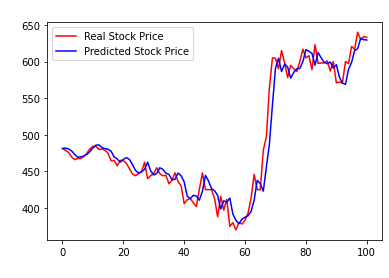

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Cipla Stock Price Prediction for year 2020 till may', color = 'white')
plt.xlabel('Time', color = 'white')
plt.ylabel('Cipla Stock Price', color = 'white')
plt.legend()
plt.show()

In [0]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

17.758633325442922
